In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [86]:
img = cv2.imread('taylor.jpg', cv2.IMREAD_COLOR)
# Convert to gray-scale
def gray():
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray
# Blur the image to reduce noise
def imgblur():
    img_blur = cv2.medianBlur(gray(), 5)
    return img_blur

def hough():
    circles = cv2.HoughCircles(imgblur(), cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=200, param2=10, minRadius=5, maxRadius=30)
    # Draw detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw outer circle
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw inner circle
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)
        plot()

def plot():
    imgplot = plt.imshow(img)
    plt.show()  

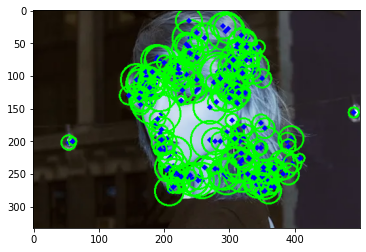

In [87]:
hough()

In [88]:
import cv2
import numpy as np

# Read image
image = cv2.imread('taylor.jpg')

# Convert image to grayscale
def gray():
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return gray

# Use canny edge detection
def edges():
    edges = cv2.Canny(gray(),50,150,apertureSize=3)
    return edges

# Apply HoughLinesP method to
# to directly obtain line end points

def hough_lines():
    lines_list =[]
    lines = cv2.HoughLinesP(
                edges(), # Input edge image
                1, # Distance resolution in pixels
                np.pi/180, # Angle resolution in radians
                threshold=100, # Min number of votes for valid line
                minLineLength=5, # Min allowed length of line
                maxLineGap=10 # Max allowed gap between line for joining them
                )

    for points in lines:
        # Extracted points nested in the list
        x1,y1,x2,y2=points[0]
        # Draw the lines joing the points
        
        # On the original image
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
        # Maintain a simples lookup list for points
        lines_list.append([(x1,y1),(x2,y2)])
        

    plot()
    
# Save the result image
#cv2.imwrite('detectedLines.png',image)


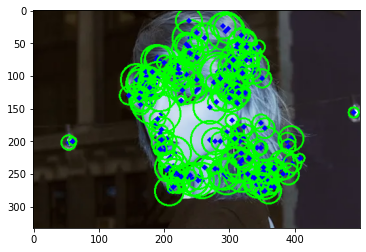

In [89]:
hough_lines()

In [124]:
import cv2
import numpy as np

img = cv2.imread('cat.png')

In [125]:
def HoughLines2():
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,100,200,apertureSize = 3)
    minLineLength = 30
    maxLineGap = 10
    lines = cv2.HoughLinesP(edges,1,np.pi/180,15,minLineLength=minLineLength,maxLineGap=maxLineGap)
    for x in range(0, len(lines)):
        for x1,y1,x2,y2 in lines[x]:
            cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
            
    plot()
    
#cv2.imshow('hough',img)
#cv2.waitKey(0)

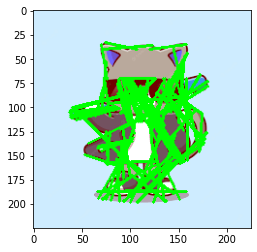

In [126]:
HoughLines2()